In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/regmi/Downloads/Data Science-20240808T171357Z-001/Data Science/Task 1 YouTube Streamer Analysis/youtubers_df.csv')


In [4]:
# Explore the dataset structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB
None
   Rank       Username           Categories   Suscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India

In [11]:

print("\nFirst Few Rows:")
print(df.head())


First Few Rows:
   Rank       Username           Categories   Suscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtub

In [13]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
               Rank    Username      Categories    Suscribers         Country  \
count   1000.000000        1000             694  1.000000e+03            1000   
unique          NaN         994              45           NaN              29   
top             NaN  NickyJamTV  Música y baile           NaN  Estados Unidos   
freq            NaN           2             160           NaN             293   
mean     500.500000         NaN             NaN  2.189440e+07             NaN   
std      288.819436         NaN             NaN  1.682775e+07             NaN   
min        1.000000         NaN             NaN  1.170000e+07             NaN   
25%      250.750000         NaN             NaN  1.380000e+07             NaN   
50%      500.500000         NaN             NaN  1.675000e+07             NaN   
75%      750.250000         NaN             NaN  2.370000e+07             NaN   
max     1000.000000         NaN             NaN  2.495000e+08             NaN   

      

In [14]:
# Check for missing data
print("\nMissing Data:")
print(df.isnull().sum())


Missing Data:
Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


In [16]:
# Print column names to check their correctness
print("Column Names:")
print(df.columns)

Column Names:
Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')


In [42]:
# Convert columns to numeric, forcing errors to NaN
df['Suscribers'] = pd.to_numeric(df['Suscribers'], errors='coerce')
df['Visits'] = pd.to_numeric(df['Visits'], errors='coerce')
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')
df['Comments'] = pd.to_numeric(df['Comments'], errors='coerce')


In [43]:
# Drop rows with NaN values in numeric columns
df = df.dropna(subset=['Suscribers', 'Visits', 'Likes', 'Comments'])


In [45]:
#Check data types after conversion
print("\nData Types After Conversion:")
print(df.dtypes)


Data Types After Conversion:
Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object


In [46]:
# 1. Data Exploration
# Check for missing data
print("\nMissing Data:")
print(df.isnull().sum())


Missing Data:
Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


In [47]:
# Check for outliers using IQR
numeric_columns = ['Suscribers', 'Visits', 'Likes', 'Comments']
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))
print("\nOutliers Detected (IQR):")
print(outliers_iqr.sum())


Outliers Detected (IQR):
Suscribers     79
Visits        131
Likes         149
Comments      151
dtype: int64


In [48]:
# Check for outliers using Z-score
z_scores = np.abs(stats.zscore(df[numeric_columns]))
outliers_z = (z_scores > 3).sum(axis=0)
print("\nOutliers Detected (Z-score):")
print(outliers_z)


Outliers Detected (Z-score):
Suscribers    17
Visits         6
Likes          6
Comments       8
dtype: int64


Trend Analaysis

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Identify trends among categories
category_counts = df['Categories'].value_counts()
print("\nCategory Distribution:")
print(category_counts)


Category Distribution:
Categories
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor                   6

C:\Users\regmi\AppData\Local\Temp\ipykernel_1424\2071227798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


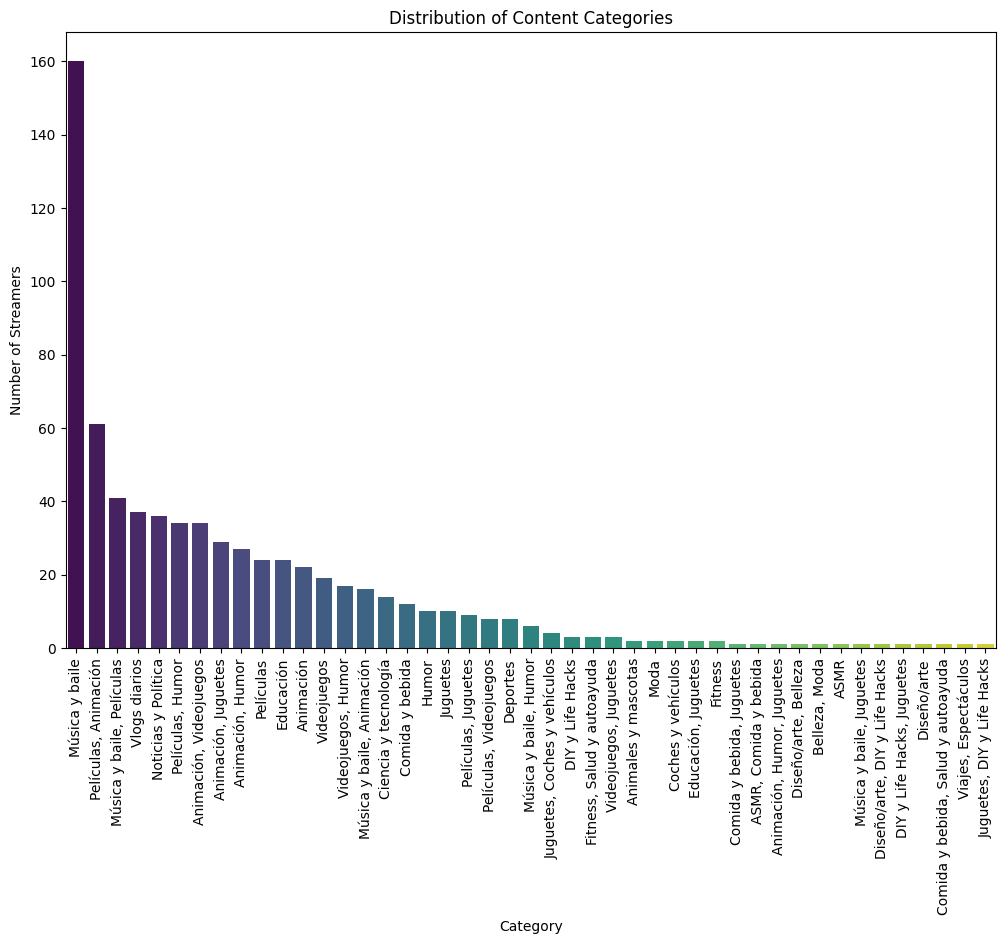

In [21]:
# Visualize category distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Content Categories')
plt.xlabel('Category')
plt.ylabel('Number of Streamers')
plt.show()

In [22]:
# Correlation between subscribers, likes, and comments
correlation_matrix = df[['Suscribers', 'Likes', 'Comments']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
            Suscribers     Likes  Comments
Suscribers    1.000000  0.211639  0.036350
Likes         0.211639  1.000000  0.325911
Comments      0.036350  0.325911  1.000000


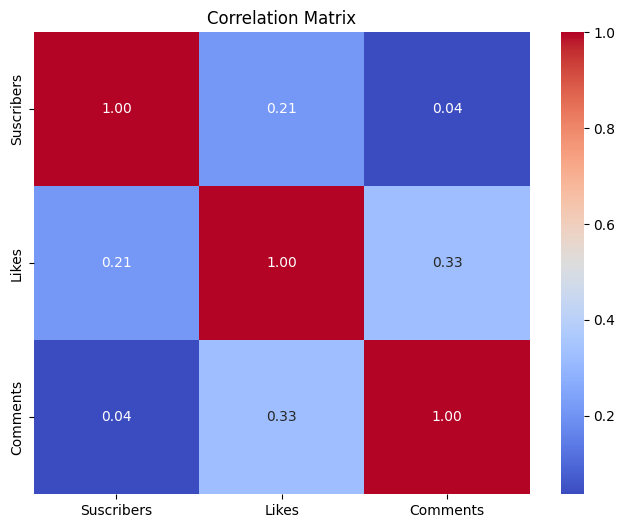

In [23]:
# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Audience Study

In [24]:
# Analyze the distribution of audiences by country
country_counts = df['Country'].value_counts()
print("\nAudience Distribution by Country:")
print(country_counts)


Audience Distribution by Country:
Country
Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistán           11
Argentina           7
Egipto              5
Francia             4
Turquía             4
Arabia Saudita      4
España              4
Iraq                4
Japón               3
Bangladesh          3
Reino Unido         3
Marruecos           2
Argelia             2
Perú                2
Singapur            1
Ecuador             1
Jordania            1
El Salvador         1
Somalia             1
Name: count, dtype: int64


C:\Users\regmi\AppData\Local\Temp\ipykernel_1424\1000459314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='plasma')


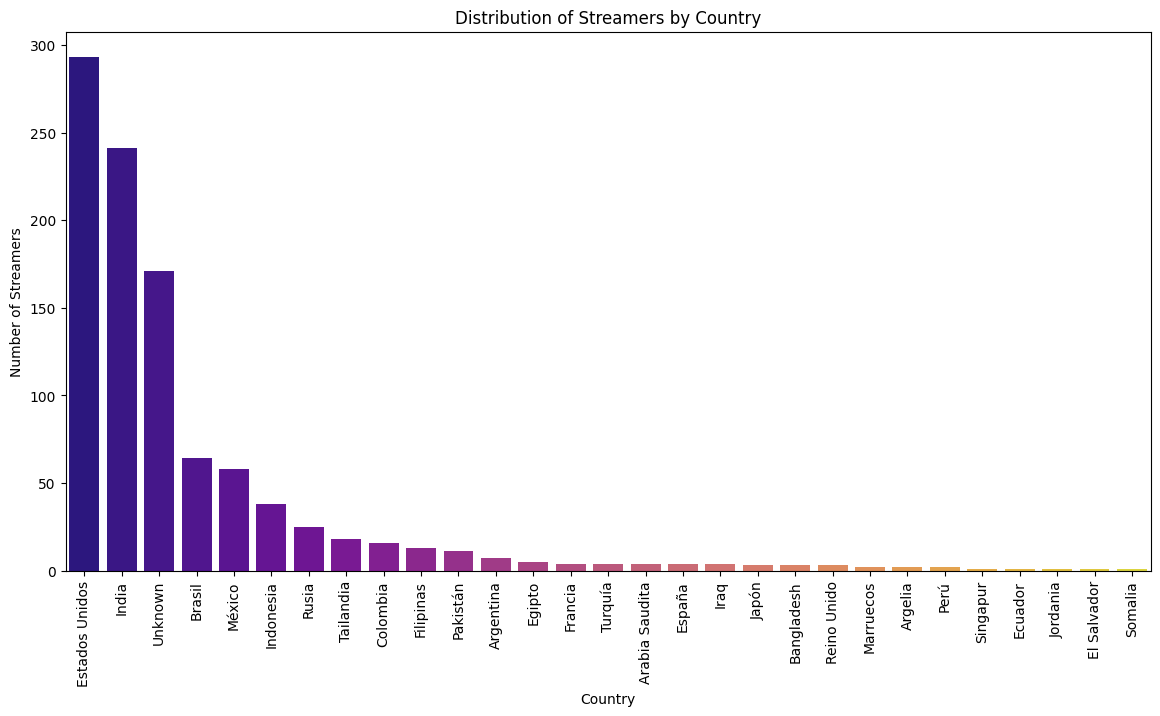

In [25]:
# Visualize audience distribution by country
plt.figure(figsize=(14, 7))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='plasma')
plt.xticks(rotation=90)
plt.title('Distribution of Streamers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.show()

In [26]:
# Regional preferences for specific content categories
category_by_country = df.groupby('Country')['Categories'].value_counts().unstack()
print("\nCategory Distribution by Country:")
print(category_by_country)


Category Distribution by Country:
Categories      ASMR  ASMR, Comida y bebida  Animación  Animación, Humor  \
Country                                                                    
Arabia Saudita   NaN                    NaN        NaN               NaN   
Argelia          NaN                    NaN        NaN               NaN   
Argentina        NaN                    NaN        1.0               NaN   
Bangladesh       NaN                    NaN        NaN               NaN   
Brasil           NaN                    NaN        3.0               2.0   
Colombia         NaN                    NaN        NaN               2.0   
Egipto           NaN                    NaN        NaN               NaN   
España           NaN                    NaN        NaN               NaN   
Estados Unidos   1.0                    1.0        4.0              17.0   
Filipinas        NaN                    NaN        NaN               NaN   
Francia          NaN                    NaN        Na

Performance Metrics

In [27]:
# Calculate average performance metrics
average_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()
print("\nAverage Performance Metrics:")
print(average_metrics)


Average Performance Metrics:
Suscribers    2.189440e+07
Visits        1.209446e+06
Likes         5.363259e+04
Comments      1.288768e+03
dtype: float64


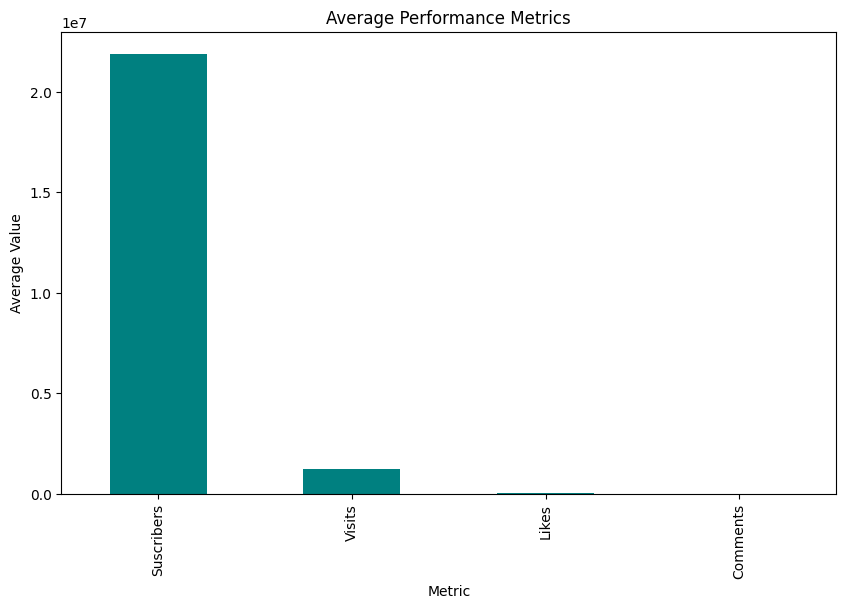

In [28]:
# Visualize average metrics
plt.figure(figsize=(10, 6))
average_metrics.plot(kind='bar', color='teal')
plt.title('Average Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.show()

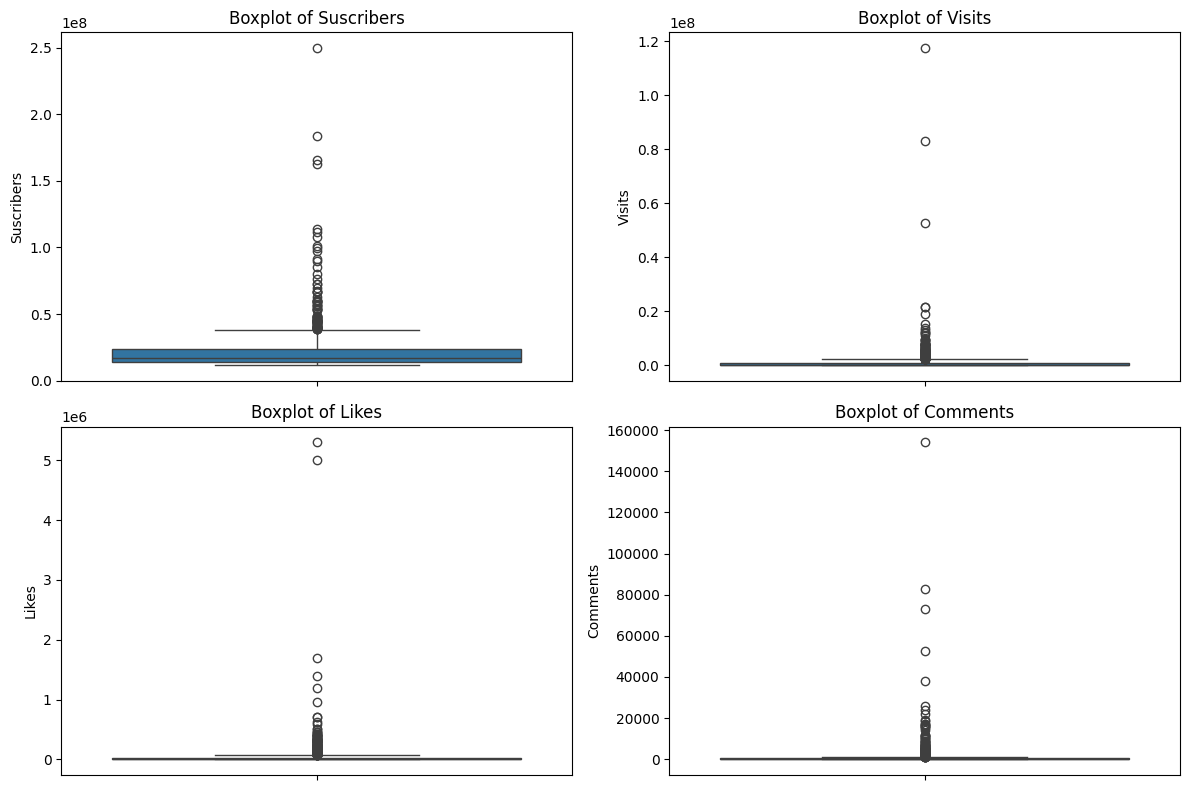

In [29]:
# Identify patterns or anomalies using boxplots
plt.figure(figsize=(12, 8))
for i, column in enumerate(['Suscribers', 'Visits', 'Likes', 'Comments'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Content Catrgories

In [30]:
# Explore the distribution of content categories
category_distribution = df['Categories'].value_counts()
print("\nContent Category Distribution:")
print(category_distribution)


Content Category Distribution:
Categories
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor            

C:\Users\regmi\AppData\Local\Temp\ipykernel_1424\1678320907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='magma')


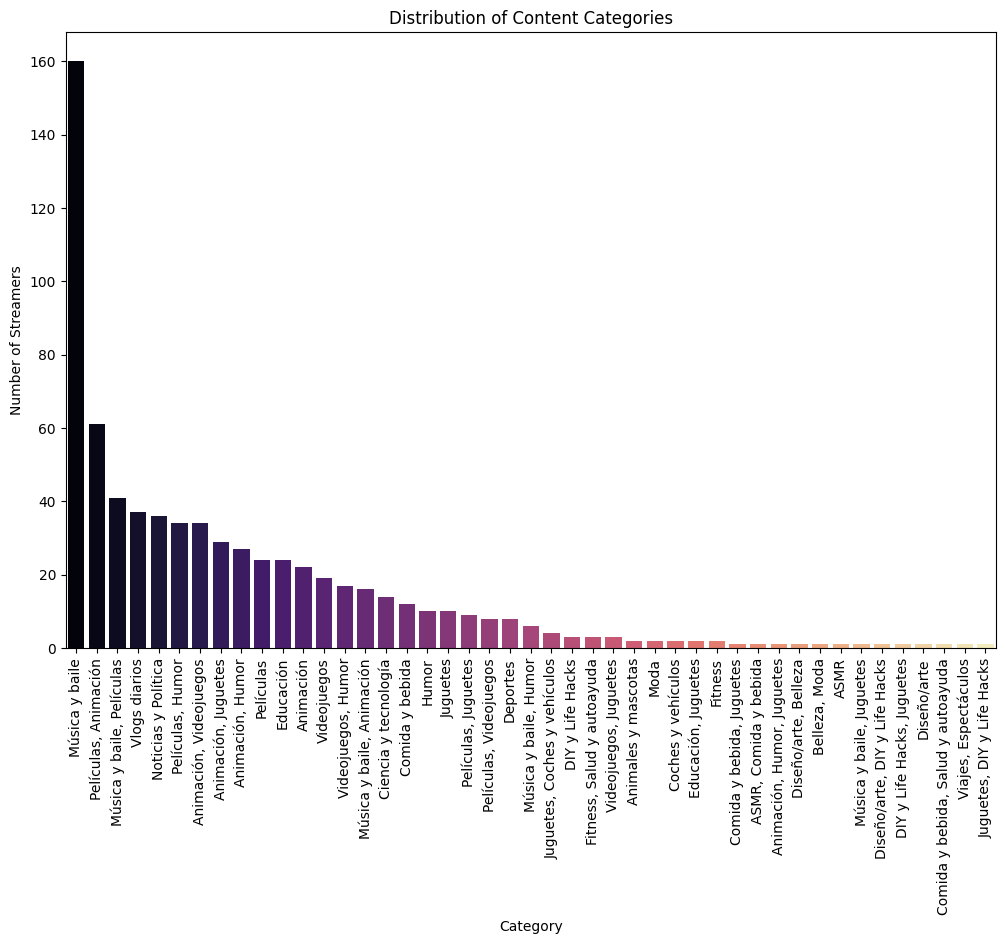

In [31]:
# Visualize content categories
plt.figure(figsize=(12, 8))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Distribution of Content Categories')
plt.xlabel('Category')
plt.ylabel('Number of Streamers')
plt.show()

In [49]:
# Performance metrics by category
try:
    category_performance = df.groupby('Categories').mean(numeric_only=True)
    print("\nPerformance Metrics by Category:")
    print(category_performance)
except Exception as e:
    print("\nError in Performance Metrics by Category:")
    print(e)


Performance Metrics by Category:
                                          Rank    Suscribers        Visits  \
Categories                                                                   
ASMR                                600.000000  1.520000e+07  3.685000e+05   
ASMR, Comida y bebida               829.000000  1.300000e+07  5.575000e+05   
Animación                           546.681818  1.764091e+07  6.367182e+05   
Animación, Humor                    486.259259  2.078519e+07  3.760126e+06   
Animación, Humor, Juguetes          733.000000  1.390000e+07  8.000000e+03   
Animación, Juguetes                 404.275862  2.937586e+07  5.254483e+05   
Animación, Videojuegos              505.852941  1.939412e+07  1.200059e+06   
Animales y mascotas                 586.500000  1.560000e+07  2.231450e+06   
Belleza, Moda                       244.000000  2.390000e+07  9.645000e+05   
Ciencia y tecnología                518.500000  1.726429e+07  8.871286e+05   
Coches y vehículos            

In [50]:
# 6. Brands and Collaborations

In [51]:
# Check content of 'Links' column to analyze brand collaborations
print("\nLinks Column Sample:")
print(df['Links'].head())


Links Column Sample:
0    http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1    http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2    http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3    http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4    http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
Name: Links, dtype: object


. Benchmarking

In [55]:
# Identify top-performing content creators
benchmark = df[['Suscribers', 'Visits', 'Likes', 'Comments']].median()
top_performers = df[
    (df['Suscribers'] > benchmark['Suscribers']) &
    (df['Visits'] > benchmark['Visits']) &
    (df['Likes'] > benchmark['Likes']) &
    (df['Comments'] > benchmark['Comments'])
]
print("\nTop Performing Content Creators:")
print(top_performers)



Top Performing Content Creators:
     Rank              Username              Categories   Suscribers  \
1       2               MrBeast      Videojuegos, Humor  183500000.0   
5       6             PewDiePie  Películas, Videojuegos  111500000.0   
9      10                   WWE             Videojuegos   97200000.0   
10     11             BLACKPINK          Música y baile   91300000.0   
14     15                   BTS          Música y baile   76500000.0   
..    ...                   ...                     ...          ...   
488   489     BeastPhilanthropy         Comida y bebida   16900000.0   
490   491          DesiMelodies          Música y baile   16800000.0   
491   492            IvanaAlawi        Películas, Humor   16800000.0   
493   494  DeToxoMoroxo-Oficial    Películas, Animación   16800000.0   
496   497      SagarKalraShorts           Vlogs diarios   16800000.0   

            Country       Visits      Likes  Comments  \
1    Estados Unidos  117400000.0  5300000.0 

Content Recommendations


Recommended Categories Based on Average Likes and Comments:
                            Categories          Likes     Comments
42                  Videojuegos, Humor  420511.764706  4827.058824
44                       Vlogs diarios  187244.945946   980.405405
24                               Humor  169990.000000  5159.800000
18                Diseño/arte, Belleza  152400.000000  1100.000000
3                     Animación, Humor  145768.333333  5344.962963
11                     Comida y bebida  128664.750000  3053.416667
19       Diseño/arte, DIY y Life Hacks  127300.000000  2200.000000
7                  Animales y mascotas  102750.000000  2806.000000
6               Animación, Videojuegos   79294.029412  3786.617647
8                        Belleza, Moda   62300.000000  1100.000000
9                 Ciencia y tecnología   59283.142857  1363.571429
41                         Videojuegos   57121.052632  1760.157895
39              Películas, Videojuegos   48083.375000  1569.500000
3

<Figure size 1200x800 with 0 Axes>

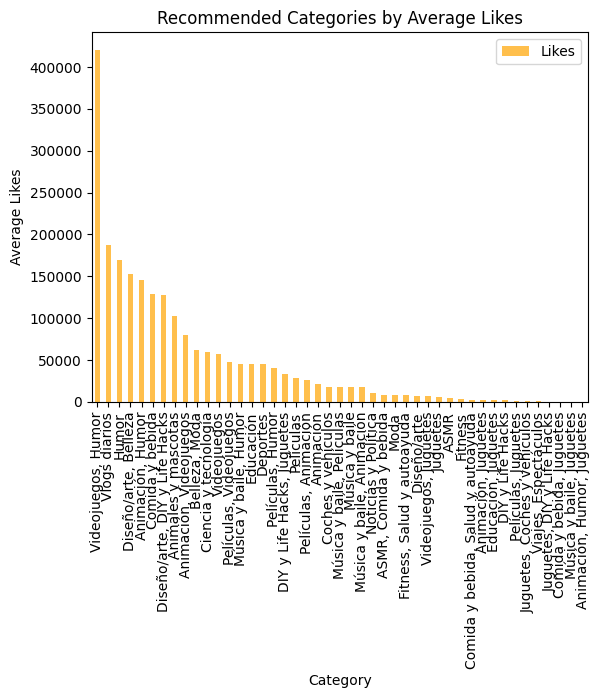

<Figure size 1200x800 with 0 Axes>

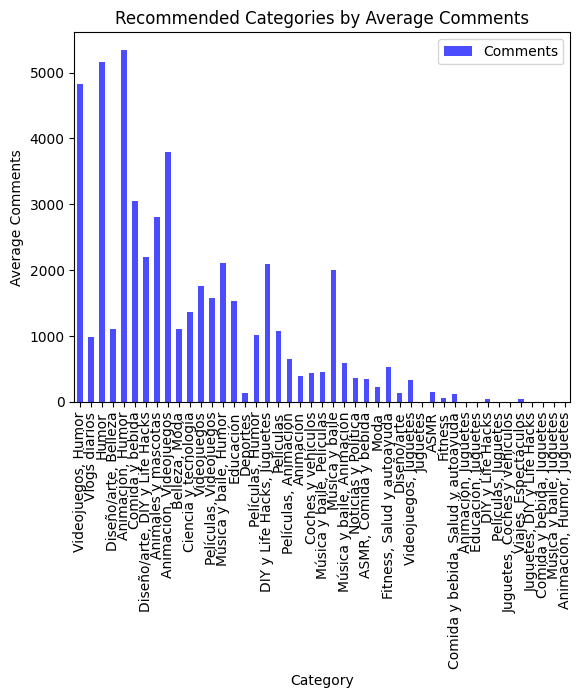

In [66]:
# Perform aggregation
try:
    # Calculate average likes and comments per category
    recommended_categories = df.groupby('Categories').agg({
        'Likes': 'mean',
        'Comments': 'mean'
    }).reset_index()  # Ensure 'Categories' is a column, not an index
    
    # Sort categories based on average likes and comments
    sorted_recommendations = recommended_categories.sort_values(by=['Likes', 'Comments'], ascending=False)
    
    print("\nRecommended Categories Based on Average Likes and Comments:")
    print(sorted_recommendations)
    # Visualize recommended categories
    plt.figure(figsize=(12, 8))
    sorted_recommendations.plot(kind='bar', x='Categories', y='Likes', color='orange', alpha=0.7)
    plt.title('Recommended Categories by Average Likes')
    plt.xlabel('Category')
    plt.ylabel('Average Likes')
    plt.xticks(rotation=90)
    plt.show()
    
    
    plt.figure(figsize=(12, 8))
    sorted_recommendations.plot(kind='bar', x='Categories', y='Comments', color='blue', alpha=0.7)
    plt.title('Recommended Categories by Average Comments')
    plt.xlabel('Category')
    plt.ylabel('Average Comments')
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("\nError in Performance Metrics by Category:")
    print(e)